# Statistical modelling with Python

## Simple linear Regression with Python-native SkiKit-Learn Package

Imports necessary for Regression models with SciKitLearn

In [2]:
# imports necessary for statistical modelling
# convention is to define imports at the top of scripts

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Using the ALLBUS data set for standard linear regressions

In [3]:
# import data set, set directory
home_dir = "/home/tobias_giesemann/Dropbox/Uni_Master/02SS19/01Advanced_Statistical_Modelling/Essay/"

# using pandas dataframe as a similar data structure to R dataframes
allbus_df = pd.read_csv(home_dir+"data/allbus_small.csv", index_col=0)

#show head
allbus_df.head()


,income,sex,age,eduyears,eastwest,socialclass_self,leftright
1,1800.0,FRAU,47.0,13.0,NEUE BUNDESLAENDER,MITTELSCHICHT,2.0
2,2000.0,MANN,52.0,13.0,NEUE BUNDESLAENDER,MITTELSCHICHT,4.0
3,2500.0,MANN,61.0,9.0,ALTE BUNDESLAENDER,MITTELSCHICHT,8.0
4,860.0,FRAU,54.0,12.0,ALTE BUNDESLAENDER,NaN,3.0
5,NaN,MANN,71.0,NaN,ALTE BUNDESLAENDER,OBERSCHICHT,7.0


In [4]:
#description of numeric variables
allbus_df.describe()

,income,age,eduyears,leftright
count,2654.000000,3486.000000,3303.000000,3335.000000
mean,1609.666164,51.143144,12.632758,5.078561
std,1100.712568,17.567575,3.694805,1.700014
min,1.000000,18.000000,4.000000,1.000000
25%,850.000000,37.000000,10.000000,4.000000
50%,1400.000000,52.000000,12.000000,5.000000
75%,2000.000000,65.000000,15.000000,6.000000
max,9500.000000,97.000000,33.000000,10.000000


## Plotting in Python with package "Seaborn"

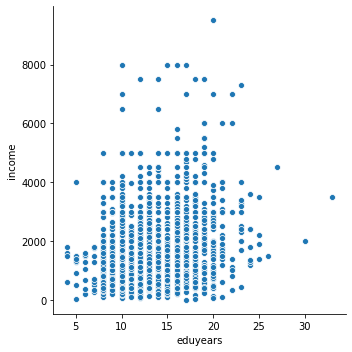

In [13]:
# basic plotting with seaborn plotting package
basic_plot = sns.relplot(x="eduyears",y="income", data=allbus_df)

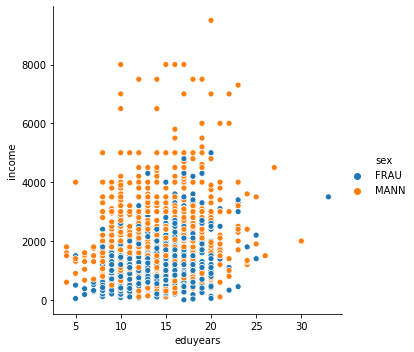

In [12]:
# little more advanced plotting
fair_plot = sns.relplot(x="eduyears",y="income", hue="sex", data=allbus_df)

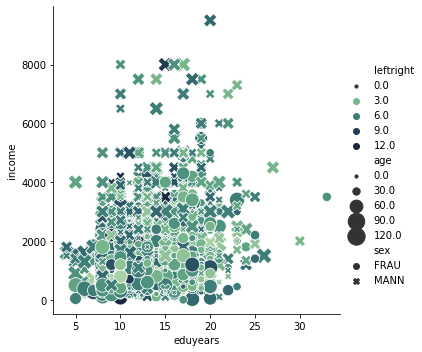

In [11]:
# too much for one plot, but great features
overly_advanced_plot = sns.relplot(x="eduyears",
            y="income", 
            hue="leftright", 
            style="sex", 
            size="age", 
            palette="ch:r=-.5,l=.75",
            sizes=(10,300),
            data=allbus_df)
overly_advanced_plot.savefig(home_dir+'figures/python/overly_advanced_plot.pdf')


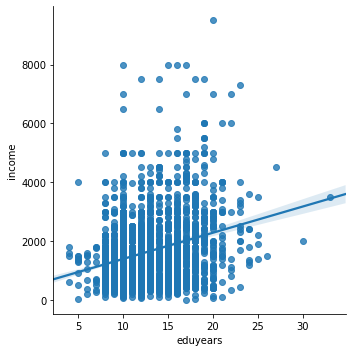

In [10]:
# simple and fast plot for linear models -> very powerful
lm_plot = sns.lmplot('eduyears', 'income', data=allbus_df, fit_reg=True)

Linear Models with SciKit Learn

In [4]:
# reshape input variables
regression_df1 = allbus_df[['income','age']]
regression_df1.dropna(inplace=True)
X = np.array([regression_df1.age]).reshape(-1, 1)
y = np.array([regression_df1.income]).reshape(-1, 1)

# define model
regression_model = LinearRegression()
regression_model.fit(X, y)

y_predicted = regression_model.predict(X)

# model evaluation
mse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Estimate Std.:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Mean squared error: ', mse)
print('R2 score: ', r2)


Estimate Std.: [[2.79715344]]
Intercept: [1465.57232066]
Mean squared error:  1208951.0226202777
R2 score:  0.002015611062190281


/home/tobias_giesemann/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Linear Regression with Package StatsModels

In [23]:
import statsmodels.api as sm

# import data set, set directory
home_dir = "/home/tobias_giesemann/Dropbox/Uni_Master/02SS19/01Advanced_Statistical_Modelling/Essay/"

# using pandas dataframe as a similar data structure to R dataframes
allbus_df = pd.read_csv(home_dir+"data/allbus_small.csv", index_col=0)

#show head
allbus_df.head()

# drop nan values
allbus_df. dropna(inplace = True)


### Linear Regression

As we can see, this emulation of the R syntax is much easier to implement

In [25]:
import statsmodels.formula.api as smf

lm1 = smf.ols('income ~ 1+age+sex+eduyears+eastwest+leftright', data=allbus_df).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     134.5
Date:                Thu, 25 Jul 2019   Prob (F-statistic):          4.95e-126
Time:                        16:40:57   Log-Likelihood:                -20109.
No. Observations:                2418   AIC:                         4.023e+04
Df Residuals:                    2412   BIC:                         4.026e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## Residual Plot with Python

As this plot is often needed to check for homoscedascity, I will check if there is an easy implementation in python as well. As we will see, this is not the case, and we rather need to build our own plot.

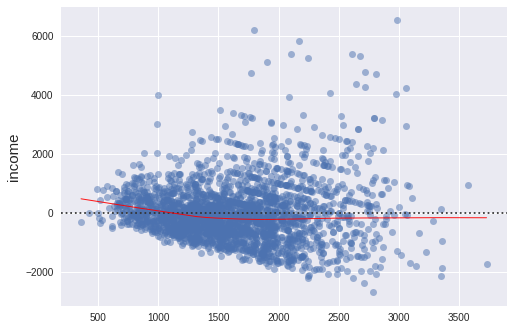

In [41]:
# fitted values (need a constant term for intercept)
model_fitted_y = lm1.fittedvalues

# residual plot
sns.residplot(x=model_fitted_y,
              y="income", 
              data=allbus_df, 
              lowess = True, 
              scatter_kws={'alpha':0.5}, 
              line_kws={"color": "red", "lw": 1, "alpha": 0.9})

Here, we would rather have to check for heteroscedascity and maybe consider a quantile-regression model